# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

**1.1 (5 pts) Prove that  vec(AXB)=(B⊤⊗A)vec(X)  if  vec(X)  is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise?**

$\square$
Let 
$$
A\in ℝ^{m \times n} \qquad X \in ℝ^{n \times p} \qquad B \in ℝ^{p \times l}
$$
Since $(AXB) \in ℝ^{m \times l}$, then $\text{vec}(AXB) \in ℝ^{ml \times 1}$
Also, $B^T \otimes A \in ℝ^{ml \times pn}$ and therefore: $(B^T \otimes A) \text{vec}(X) \in ℝ^{ml \times 1}$
Lets consider right side of equation:

$$
(B^T \otimes A) \text{vec}(X) = 
\begin{bmatrix}
b_{11} A & \cdots & b_{p1} A \\
\cdots & & \cdots  \\
b_{1l} A & \cdots & b_{pl} A \\
\end{bmatrix}
\begin{bmatrix}
X_{1} \\
\cdots \\
X_{pn} \\
\end{bmatrix}
= 
\begin{bmatrix}
b_{11} A X_{1} + & \cdots & + b_{p1} A X_{pn} \\
\cdots & & \cdots  \\
b_{1l} A X_{1} + & \cdots & + b_{pl} A X_{pn}\\
\end{bmatrix}
$$

Now, lets look at left side:

$$
\text{vec}(AXB) = \text{vec}
\Bigg(A
\begin{bmatrix}
X_{1} & \cdots & X_{pn} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{1l} \\
\cdots & & \cdots  \\
b_{p1} & \cdots & b_{pl} \\
\end{bmatrix}
\Bigg)
= 
\text{vec}
\Bigg(
\begin{bmatrix}
A X_{1} & \cdots & A X_{pn} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & \cdots & b_{1l} \\
\cdots & & \cdots  \\
b_{p1} & \cdots & b_{pl} \\
\end{bmatrix}
\Bigg)
=
\text{vec}(
\begin{bmatrix}
b_{11} A X_{1} + & \cdots & + b_{p1} A X_{pn} \cdots \cdots \cdots b_{1l} A X_{1} + & \cdots & + b_{pl} A X_{pn}\\
\end{bmatrix}
)
=
\begin{bmatrix}
b_{11} A X_{1} + & \cdots & + b_{p1} A X_{pn} \\
\cdots & & \cdots  \\
b_{1l} A X_{1} + & \cdots & + b_{pl} A X_{pn}\\
\end{bmatrix}
$$

And we can see that right and left parts are equal to each other
$\blacksquare$

It's obvious that  $\underset{col}{\text{vec}}(X) = \underset{row}{\text{vec}}(X^T)$. Then we can rewrite our final equation as follows:
$$
\underset{col}{\text{vec}}((AXB)^T) = (A \otimes B^T)\underset{col}{\text{vec}}(X^T)
$$
And so
$$
\boxed{
\underset{row}{\text{vec}}(AXB) = (A \otimes B^T) \underset{row}{\text{vec}}(X)
}
$$

---

**1.2 (2 pts) What is the complexity of a naive computation of  (A⊗B)x ? Show how it can be reduced.**

Assume 
$$
A \in ℝ^{m\times n} \qquad B \in ℝ^{p \times l} \qquad x \in ℝ^{np \times 1}
$$

1) $A \otimes B$ requires $O(m \cdot n \cdot l \cdot p)$ as we have to multiply each element of $A$ to each element of $B$. 

2) Matrix vector multiplication for our case requires $2nmlp - np$ operations, which is $O(m \cdot n \cdot l \cdot p)$.

So, we have complexity $O(m \cdot n \cdot l \cdot p) + O(m \cdot n \cdot l \cdot p)$. In case of equal dims: $\boxed{O(n^4)}$
$$
$$
Complexity can be reduced if we use equality from previous task:
$$
\text{vec}(AXB) = (B^\top \otimes A)\, \text{vec}(X)
$$
1) $C = AX$ requires $O(m\cdot n \cdot p) operations \quad C \in ℝ^{m \times p} $

2) $Res = CB$ requires $O(l \cdot m \cdot p)$

So finally it requires $ O(m \cdot n \cdot p) + O(l \cdot  m\cdot p)$ And in case of equal dims: $\boxed{O(n^3)}$
 
 ----



**1.3 (3 pts) Let matrices  A  and  B  have eigendecompositions  A=SAΛAS−1A  and  B=SBΛBS−1B . Find eigenvectors and eigenvalues of the matrix  A⊗I+I⊗B , where dimension of  I  coincides with the dimension of  A  and  B .**


$$
A \otimes I + I \otimes B = S_AΛ_AS_A^{-1} \otimes I + I \otimes  S_BΛ_BS_B^{-1} = 
$$ 

Since $I = S_AS_A^{-1} = S_BS_B^{-1}$ ,then 

$$
= S_AΛ_AS_A^{-1} \otimes S_BS_B^{-1} + S_AS_A^{-1}\otimes S_BΛ_BS_B^{-1} =
$$

Since $(A\otimes B)(C\otimes D) = AC \otimes BD$, then 

$$
 = (S_AΛ_A \otimes S_B)(S_A^{-1} \otimes S_B^{-1} + (S_A \otimes S_BΛ_B)(S_A^{-1}\otimes S_B^{-1})) = 
$$

But we know that $AC + BC = (A+B)C$ then

$$
=(S_AΛA \otimes S_B + S_A \otimes S_BΛ_B)(S_A^{-1} \otimes S_B^{-1}) =
(S_AΛ_A \otimes S_B I+ S_A I \otimes S_B Λ_B)(S_A^{-1} \otimes S_B^{-1}) =
$$

Again, we know that $(A\otimes B)(C\otimes D) = AC \otimes BD$. Then

$$
= (S_A \otimes S_B)(Λ_A \otimes I + I \otimes Λ_B)(S_A^{-1} \otimes S_B^{-1}) = (S_A \otimes S_B)(Λ_A \otimes I + I \otimes Λ_B)(S_A \otimes S_B)^{-1} = S_{AB}Λ_{AB}S_{AB}^{-1}
$$

So, sought eigenvectors are columns of $\boxed{S_A \otimes S_B}$
and eigenvalues are $\boxed{ λ_{ij} = λ_{A(i)} + λ_{B(j)} }$


---


**1.4 (10 pts) Let  A=diag(11000,21000,…9991000,1,1000) . Estimate analytically the number of iterations required to solve linear system with  A  with the relative accuracy  10−4  using:**
* Richardson iteration with the optimal choice of parameter (use  2 -norm)
* Chebyshev iteration (use  2 -norm)
* Conjugate gradient method (use  A -norm).

Condition number is defined as $\frac{λ_{max}}{λ_{min}}$. Our matrix $A$ is diagonal with $N$ diag elements, therefore $\text{cond}(A) = \frac{1000}{0.001} = 10^6$

Let $x$ - solution

convergence of **Richardson iteration**: $q = \frac{\text{cond}(A) -1 }{\text{cond}(A) +1}$
Error for $k$ iteration:
$e_k = x - \hat x_k$. On the zero step: $e_0 = x$.
Absolute error for $k$ iteration is: $\|e_k\|_2 \leq q^k\|e_0\|_2$

Relative error for $k$ iteration: $\frac{\|e_k\|_2}{\|e_0\|_2} = \frac{\|x-\hat x_k \|_2}{\|x\|_2} \leq q^k$

From initial condition we need to have relative accuracy $ϵ = 1e-4 $ therefore:
$$q^k \leq ϵ $$
$$ k \geq \log_q ϵ  $$
$$ \boxed{k \geq 4605170}$$ 

For **Chebyshev iteration** convergence rate is:
$q = \frac{\sqrt{\text{cond}(A) -1 }} {\sqrt{\text{cond}(A) +1 }}$

Absolute error for $k$ iteration: $\|e_k\|_2 \leq Cq^k\|e_0\|_2$
Relative error for $k$ iteration: $\frac{\|e_k\|_2}{\|e_0\|_2} = \frac{\|x-\hat x_k \|_2}{\|x\|_2} \leq Cq^k $
Now we again can find number of iterations:
$$Cq^k \leq ϵ $$
$$q^k \leq \frac{ϵ}{C}$$
$$k \geq \log_q ϵ -\log_q C $$
$$k \geq \frac{\ln{ϵ}}{\ln{q}} - \frac{\ln{C}}{\ln{q}}$$
Assume that $C = 1$ then
$$\boxed{k \geq 4606}$$

Finaly lets do the same for **Conjugate gradient method**:
Convergence rate on $k$ iteration: $q = \frac{\sqrt{\text{cond}(A) -1 }} {\sqrt{\text{cond}(A) +1 }}$

Relative error for $k$ iteration: $\frac{\|x-\hat x_k \|_A}{\|x\|} \leq γq^k$
Here lets recall lecture 12: If eigenvalues are clustered and there are $s$ outliers, then after $ O(s)$ iterations method will converge. In our case 1000 is an outlier, therefore condition number is 1000 times lower. Then Conjugate gradient will converge as follows:
$$
k \geq \frac{\ln{ϵ}}{\ln{q}} - \frac{\lnγ}{\ln q} 
$$ 
Assume that $γ = 1$, then 
$$\boxed{k \geq 146}$$

---

**1.5 (5 pts) Provide numerical confirmation of your estimate from theoretical point of view**

In [ ]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

eps = 1e-4  # relative error 
# create diag elements of sought matrix
diag = np.concatenate((np.arange(1,1001)/1000, np.array([1000])))
A = np.diag(diag) # sought matrix

# rightside vector
b = np.random.randn(A.shape[0],1)

# exact solution
x = (1/diag).reshape(-1,1)*b

x0 = np.zeros([len(diag), 1])

In [ ]:
def Chebyshev_iteration(A, x0 ,b , x ,tau=1,tol=1e-4,max_iter=1e7):
    assert max_iter % 2 == 0
    
    # function from the lecture
    def leb_shuffle_2n(n):
        if n == 1:
            return np.array([0,], dtype=int)
        else:
            prev = leb_shuffle_2n(n // 2)
            ans = np.zeros(n, dtype=int)
            ans[::2] = prev
            ans[1::2] = n - 1 - prev
            return ans

    # calc eignevalues
    eigvals = np.linalg.eigvals(A)
    # find min - max eigenvalues
    l_min = np.min(eigvals)
    l_max = np.max(eigvals)
    roots, taus , error = [], [], []

    #find roots
    for i in range(max_iter):
        root = np.cos((np.pi * (2 * i + 1)) / (2 * max_iter))
        roots.append(root)

    #find taus
    for r in roots:
        tau = (l_max + l_min - (l_min - l_max) * r) / 2
        taus.append(tau) 

    perm = leb_shuffle_2n(max_iter)
    
    # initialization
    xk = x0
    r = A @ xk - b
    x_norm = np.linalg.norm(x, ord=2)
    error.append(np.linalg.norm(r)/x_norm)
    
    # do iterations
    for iteration in range(int(max_iter)):
        xk = xk - 1.0 / taus[perm[iteration]] * r
        r = A @ xk - b
        
        err = np.linalg.norm(r,ord=2)/x_norm # relative error
        error.append(err)       # save it
        
        # check for tolerance
        if err < tol:
            break
    return iteration,error

# launch it
numiter,error = Chebyshev_iteration(A,x0,b,x,tau=1,tol=1e-4,max_iter=8192)

# printing 
table = PrettyTable(['iterations', 'Precision', 'Error'])
table.add_row([eps, numiter, error[-1]])
table.title = 'Chebyshev iteration' 
print(table)

+-----------------------------------------------+
|              Chebyshev iteration              |
+------------+-----------+----------------------+
| iterations | Precision |        Error         |
+------------+-----------+----------------------+
|   0.0001   |    3057   | 9.44986465447097e-05 |
+------------+-----------+----------------------+


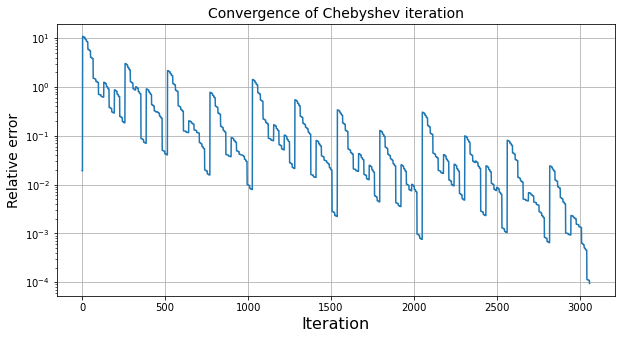

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(error)
plt.yscale('log')
plt.grid()
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('Relative error', fontsize = 14)
plt.title('Convergence of Chebyshev iteration' , fontsize = 14)
plt.show()

In [ ]:
def Richardson_iteration(A, x0, b, x, tau=1, tol=1e-4, max_iter=7e6):
    # initialization
    error = []
    x_prev = x0
    x_norm = np.linalg.norm(x,ord=2)


    error.append(np.linalg.norm(x_prev - x)/x_norm)
    
    #iterations
    for iteration in tqdm(range(int(max_iter))):
        # main part
        rk = A @ x_prev - b
        x_k = x_prev - tau * rk
        
        err = np.linalg.norm(x_k - x)/x_norm 
        error.append(err)

        if err < tol:
            break

        x_prev = x_k
    return iteration,error

# choose optimal tau value
eigvals = np.linalg.eigvals(A)
tau_optimal = 2 / (np.min(eigvals) + np.max(eigvals))

numiter, error = Richardson_iteration(A,x0,b,x,tau=tau_optimal,tol=eps,max_iter=1e7)

# printing 
table = PrettyTable(['iterations', 'Precision', 'Error'])
table.add_row([eps, numiter, error[-1]])
table.title = 'Richardson iteration' 
print(table)



+------------------------------------------------+
|              Richardson iteration              |
+------------+-----------+-----------------------+
| iterations | Precision |         Error         |
+------------+-----------+-----------------------+
|   0.0001   |  4456172  | 9.999988720909325e-05 |
+------------+-----------+-----------------------+


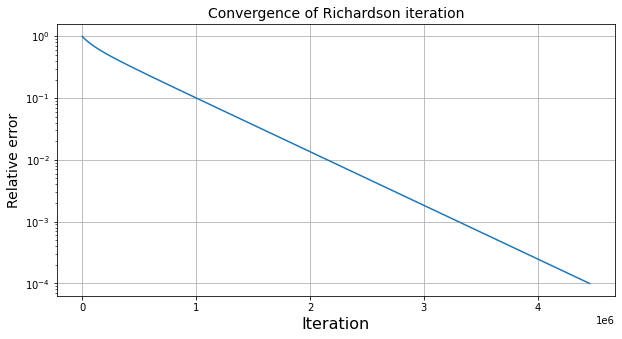

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(error)
plt.yscale('log')
plt.grid()
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('Relative error', fontsize = 14)
plt.title('Convergence of Richardson iteration' , fontsize = 14)
plt.show()

In [ ]:
def A_norm(A,err):
    return np.sqrt(err.T @ A @ err)

def conjugate_gradient(A, x0, b, x, tol=1e-4, max_iter=5e3):
    # initialization
    error = []
    r = b - A @ x0
    p = r
    xk = x0
    x_norm = A_norm(A, x)
    error.append((A_norm(A, x - x0)/x_norm)[0,0])  # error history
    
    rr_prev = (r.T @ r)
    # do iterations
    for iteration in range(int(max_iter)):
        alpha = rr_prev / (p.T @ A @ p)
        xk = xk + alpha * p
        r = r - alpha * A @ p
        rr = r.T @ r
        beta = rr / rr_prev
        p = r + beta * p
        
        err =  A_norm(A, x - xk)/x_norm 
        error.append(err[0,0]) 
        
        if err < tol:
            break
            
        rr_prev = rr
    return iteration,error

# launch it 
numiter, error = conjugate_gradient(A, x0, b, x , tol=eps, max_iter=5e3)


# printing 
table = PrettyTable(['iterations', 'Precision', 'Error'])
table.add_row([eps, numiter, error[-1]])
table.title = 'Richardson iteration' 
print(table)

+------------------------------------------------+
|              Richardson iteration              |
+------------+-----------+-----------------------+
| iterations | Precision |         Error         |
+------------+-----------+-----------------------+
|   0.0001   |    140    | 9.964661916738152e-05 |
+------------+-----------+-----------------------+


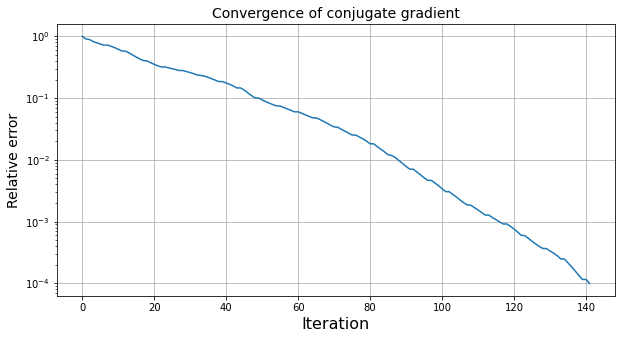

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(np.array(error))
plt.yscale('log')
plt.grid()
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('Relative error', fontsize = 14)
plt.title('Convergence of conjugate gradient' , fontsize = 14)
plt.show()

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

In [1]:
# Donwload image from your github
!gdown https://github.com/oseledets/nla2021/raw/master/hw/hw3/qrcode.gif

Downloading...
From: https://github.com/oseledets/nla2021/raw/master/hw/hw3/qrcode.gif
To: /content/qrcode.gif
100% 3.39k/3.39k [00:00<00:00, 2.52MB/s]


(-0.5, 329.5, 329.5, -0.5)

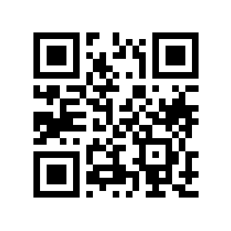

In [2]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [5]:
import numpy as np
import scipy
from scipy import sparse
from scipy import fft 
import scipy.sparse.linalg as spla

def T_matvec(x, alpha):
    n = int(len(x)**0.5)                        # size of image
    range_idx = np.arange(0,n)                  # range of indices
    i,j = np.meshgrid(range_idx, range_idx)     # matrices of indices
    # matrix with Toeplitz vector of Toeplitz vectors (it definies BTTB matrix)
    bttb_vec = (alpha/np.pi)*np.exp(-alpha * (i**2 + j**2))   
    # Matrix with Toeplitz vector of Circulant vectors
    topl_circ = np.hstack((bttb_vec, np.fliplr(bttb_vec[:,1:])))
    # Matrix with Circulant vectors of Circulantvectors
    bccb = np.vstack((topl_circ, np.flipud(topl_circ[1:,:])))
    
    # square image
    img = x.reshape(n,n)
    # calcuate padding size 
    pad_size = bccb.shape[0] - img.shape[0]

    # convolve using spectral theorem
    y = scipy.fft.ifft2(scipy.fft.fft2(bccb) * scipy.fft.fft2(np.pad(img,(0,pad_size))))[:n,:n].real

    return y

a = 0.15    # init alpha
# create linear operator
T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, a))
# blur image
y = T.matvec(x.reshape(-1,1)).reshape(n,n)

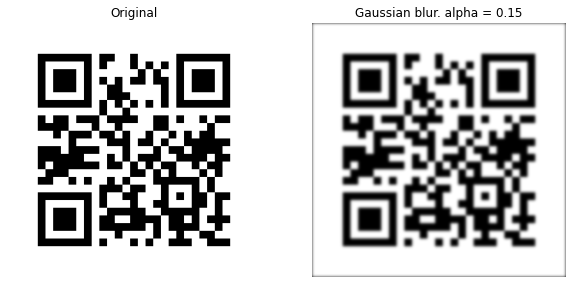

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x, cmap = 'gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(y, cmap = 'gray')
plt.axis('off')
plt.title('Gaussian blur. alpha = '+ str(a))
plt.show()

Blured image looks reasonable. Also after transformation we can see the border around picture. The reason of this effect is the fact that we used zero padding in our counvolutions and such pixels was also blured.

---

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

$\square$ 
Using the formula of gaussian kernel:
$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.
$$
We can say that matrix $T$ has strictly positive elements (for any values $i$ and $j$ we cannot have result of exponent less or equal to zero). Moreover from this formula we can see that it's symetric. 
So, we can use Cholesky decomposition:
$$
T = LL^T
$$

Lets for simplicity define:
$$
a = \exp(\frac{-1}{2σ^2})
$$
then
$$
T_{i,j} = \frac{1}{\sqrt{2\pi σ}}{a^{(i-kj)}}^2
$$
then 
$$T(k) = \begin{pmatrix}
1 & a & a^4 & a^9 & \dots & a^{(k-1)^2}\\
a & 1 & a & a^4 & \dots & a^{(k-2)^2}\\
\dots & \dots & \dots & \dots & \dots & \dots \\
a^{(k-1)^2} & a^{(k-2)^2} & a^{(k-3)^2} & a^{(k-4)^2} & \dots & 1  \\
\end{pmatrix}.$$
So, its Toeplitz matrix. 
Since we know that 
$$
T(k) = L(k)L^T(k)
$$
we can use following property:
$$
\det T(k) = (\det L(k))^2 = (1-a^2)^{(k-1)} (1-a^4)^{(k-2)} \dots (1-a^{2(k-2)})^{2} (1-a^{2(k-1)})
$$
And it is strictly more than $0$.

Also, for every vector $v$ we can write that:
$$
(v^T, T(k)v) = ((vL(k))^T , L(k)v) \geq 0 
$$
And since $T(k)$ is nonzero, then its positive definite.
$\blacksquare$

---

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [7]:
# your code is here
def cg(T, y, tol, x, maxiter = None):
    '''
    Conjugate gradient function. Wrapper for scipy.sparce.linalg.cg. 
    Allows to calculate relative error on each iteration and calcluate num of iterations
    with help of callback function
    '''
    
    num_iters = 0
    errors = []

    def callback(xk):
        # relative error
        errors.append( np.linalg.norm(xk - x.reshape(-1,),ord=2) / np.linalg.norm(x.reshape(-1,),ord=2))
        nonlocal num_iters
        num_iters += 1 #num iterations  
    
    #baseline usual cg
    x_rec, state = scipy.sparse.linalg.cg(T, y, tol=tol, callback=callback, maxiter=maxiter)
    return x_rec, state, num_iters, errors

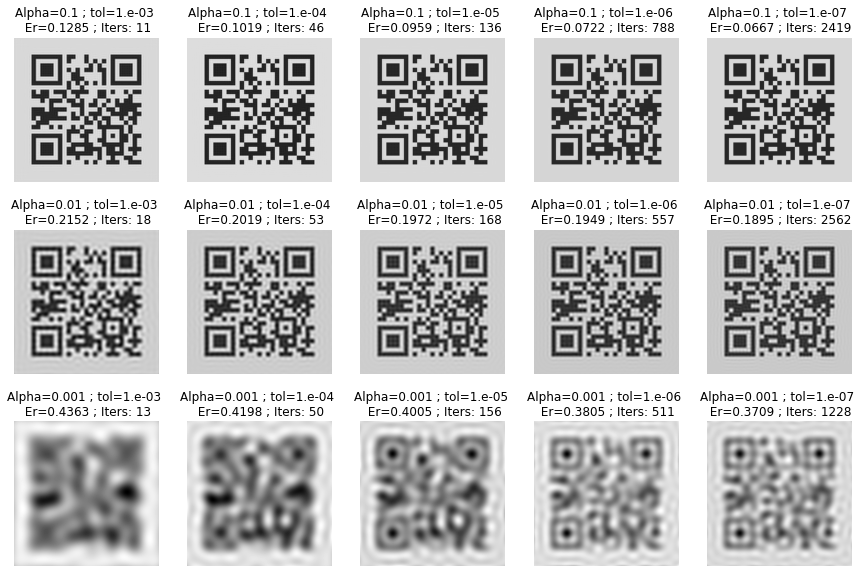

In [ ]:
# Create required ranges of variables
alphas = [1e-1, 1e-2, 1e-3]
tols = [1e-3, 1e-4 ,1e-5 ,1e-6 ,1e-7]

plt.figure(figsize = (15,10))
idx = 1 #image index

table = PrettyTable(['Alpha', 'Tolerance', 'Error', 'Iterations'])
table.title = 'Deconvolved with CG images after Gaussian bluring' 

for alpha in tqdm(alphas):
    for tol in tqdm(tols):
        #create linear operator with our blur kernel
        T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
        # aplly linear operator to image
        y = T.dot(x.reshape(-1,1))
        # deconvolve with conjugate gradient
        x_hat, state, iters, errors = cg(T, y, tol,x)
        # error on the last iteration
        final_err = np.round(errors[-1], 4) 
        
        # add result to table
        table.add_row([alpha, np.format_float_scientific(tol), final_err, iters])
                                                                        ))
         # -------- Plotting -----------
        plt.subplot(3,5,idx)
        plt.imshow(x_hat.reshape(330,330), cmap = 'gray')
        plt.axis('off') 
        plt.title('Alpha={0} ; tol={1} \n Er={2} ; Iters: {3}'.format(alpha,
                                                                       np.format_float_scientific(tol),
                                                                       final_err,
                                                                       iters
                                                                       ))
        idx +=1 # switch to next image

In [ ]:
print(table)

+----------------------------------------------------+
| Deconvolved with CG images after Gaussian bluring  |
+---------+--------------+----------+----------------+
|  Alpha  |  Tolerance   |  Error   |   Iterations   |
+---------+--------------+----------+----------------+
|   0.1   |    1.e-03    |  0.1285  |       11       |
|   0.1   |    1.e-04    |  0.1019  |       46       |
|   0.1   |    1.e-05    |  0.0959  |      136       |
|   0.1   |    1.e-06    |  0.0722  |      788       |
|   0.1   |    1.e-07    |  0.0667  |      2419      |
|   0.01  |    1.e-03    |  0.2152  |       18       |
|   0.01  |    1.e-04    |  0.2019  |       53       |
|   0.01  |    1.e-05    |  0.1972  |      168       |
|   0.01  |    1.e-06    |  0.1949  |      557       |
|   0.01  |    1.e-07    |  0.1895  |      2562      |
|  0.001  |    1.e-03    |  0.4363  |       13       |
|  0.001  |    1.e-04    |  0.4198  |       50       |
|  0.001  |    1.e-05    |  0.4005  |      156       |
|  0.001  

**1) why the relative error does not converge to zero?**

The reason is obvious. After applying bluring we lose information about exact pixels of the image, since our kernel merges neighbour pixels.

**2) why the relative error converges to different values for different  α ?**

With $\alpha$ we regularize bluring effect. The less $\alpha$ is the more bluring is and the more information we lose about exact pixels, therefore we will have different asymtotic convergence 


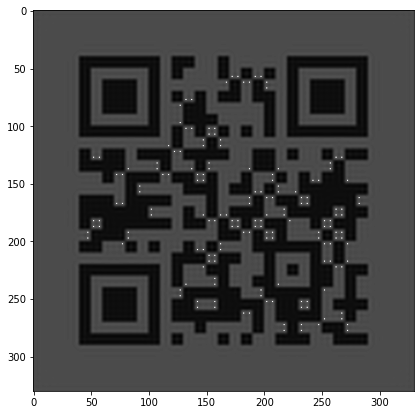

In [20]:
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, 0.1))
y = T.dot(x.reshape(-1,1))
x_hat, state, iters, errors = cg(T, y, 1e-3,x)
x_hat[x_hat>300] = 1000 # highlight points with high amplitude
plt.figure(figsize=(7,7))
plt.imshow(x_hat.reshape(330,330), cmap = 'gray')

Also interesting fact was observed. Several points from picture have higher absolute value that other. This effect can be elliminated by regularization, so I guess it happen bebause of bad condition value.


----

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [ ]:
# your code is here

# required variables
alpha = 0.01
tol = 1e-5

# create linear operator with bluring kernel
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# apply kernel to image
y = T.dot(x.reshape(-1,1))
# Create AWGN vector
N = np.random.randn(y.shape[0],1)
# Add noise
y_hat = y + N
# recover with Conj Gradient
x_rec, state, num_iters, errors = cg(T, y_hat, tol=tol, x = x, maxiter = 100)

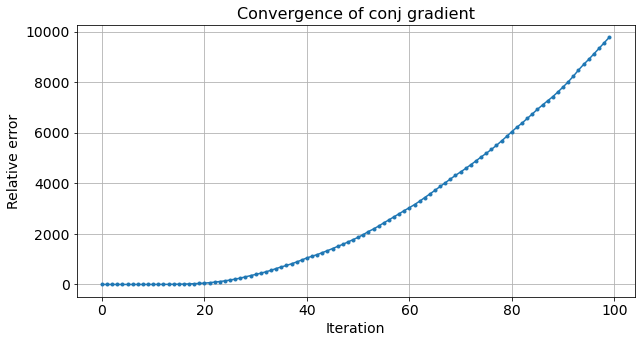

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(errors, '.-')
plt.grid()
plt.title("Convergence of conj gradient", fontsize = 16)
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Relative error', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

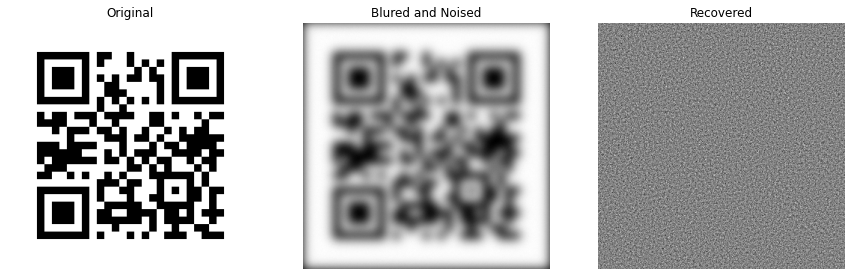

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Original')
plt.imshow(x.reshape(n,n), cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Blured and Noised')
plt.axis('off')
plt.imshow(y_hat.reshape(n,n), cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Recovered')
plt.axis('off')
plt.imshow(x_rec.reshape(n,n), cmap = 'gray')

By adding noise we destroy information about pixels in our image. Moreover our matrix $T$ has very high condition number, which means that small perturbations of $y$ leads high perturbations of $x$ estimation. Therefore conjugate gradient may converge to some solution in another linear system, which will be incorrect. That's why we can observe such effect of divergence.

We can significantly decrease the condition number using Tikhonov regularization, for example. The drawbacks of Tikhonov regularization is the trades variance for bias and fact that for extremly big and unstructured matrices it's computationaly difficult to use it.

----


## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:

# your code is here
def T_lmbda_matvec(x, aplha, lmbda):
    
    n = int(len(x)**0.5)                         # size of image
    range_idx = np.arange(0,n)                   # range of indices
    i,j = np.meshgrid(range_idx, range_idx)      # matrices of indices
    # matrix with Toeplitz vector of Toeplitz vectors (it definies BTTB matrix)
    bttb_vec = (alpha/np.pi)*np.exp(-alpha * (i**2 + j**2))   
    # Apply regularization to very first element 
    bttb_vec[0,0] += lmbda**2
    # Matrix with Toeplitz vector of Circulant vectors
    topl_circ = np.hstack((bttb_vec, np.fliplr(bttb_vec[:,1:])))
    # Matrix with Circulant vectors of Circulantvectors
    bccb = np.vstack((topl_circ, np.flipud(topl_circ[1:,:])))
    # square image
    img = x.reshape(n,n)
    # size of padding
    pad_size = bccb.shape[0] - img.shape[0]

    # convolve using spectral theorem
    y = scipy.fft.ifft2(scipy.fft.fft2(bccb) * scipy.fft.fft2(np.pad(img,(0,pad_size))))[:n,:n].real

    return y

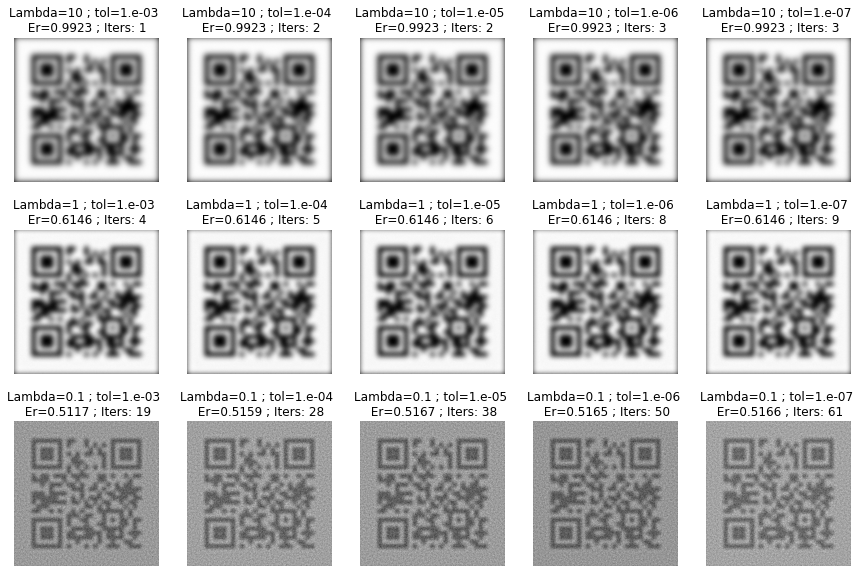

In [ ]:
# Define required variables 
alpha = 0.01
lambds = [10,1, 0.1]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

table = PrettyTable(['Lambda', 'Tolerance', 'Error', 'Iterations'])
table.title = 'Deconvolved with regularized CG images after bluring, adding noise' 


plt.figure(figsize = (15,10))
idx = 1  # image index

for l in lambds:
    for tol in tols:
        # Create Linear operator with bluring kernel
        T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
        # apply kernel to image
        y = T.dot(x.reshape(-1,1))
        # Generate AWGN vector
        N = np.random.randn(y.shape[0],1)
        # add noise to result
        y_hat = y + N
        
        # Linear operator with bluring kernel and Regularizaton 
        T_l = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, l))
        # restore image with help of reqularized kernel
        x_rec, state, iters , errors = cg(T_l, y_hat, tol, x)
        # error on the last iteration
        final_err = np.round(errors[-1], 4) 
        
        table.add_row([l, np.format_float_scientific(tol),final_err, iters ])
        # Printing
#         print('Lambda: {0} | tol: {1} | Error: {2} | Iters: {3}'.format(l,
#                                                                        np.format_float_scientific(tol),
#                                                                        final_err,
#                                                                        iters
#                                                                        ))
#         # Plotting 
        plt.subplot(3,5,idx)
        plt.imshow(x_rec.reshape(330,330), cmap = 'gray')
        plt.axis('off') 
        plt.title('Lambda={0} ; tol={1} \n Er={2} ; Iters: {3}'.format(l,
                                                                       np.format_float_scientific(tol),
                                                                       final_err,
                                                                       iters
                                                                       ))
        idx +=1

In [ ]:
print(table)

+-------------------------------------------------------------------+
| Deconvolved with regularized CG images after bluring, adding noise |
+-------------+------------------+-------------+--------------------+
|    Lambda   |    Tolerance     |    Error    |     Iterations     |
+-------------+------------------+-------------+--------------------+
|      10     |      1.e-03      |    0.9923   |         1          |
|      10     |      1.e-04      |    0.9923   |         2          |
|      10     |      1.e-05      |    0.9923   |         2          |
|      10     |      1.e-06      |    0.9923   |         3          |
|      10     |      1.e-07      |    0.9923   |         3          |
|      1      |      1.e-03      |    0.6146   |         4          |
|      1      |      1.e-04      |    0.6146   |         5          |
|      1      |      1.e-05      |    0.6146   |         6          |
|      1      |      1.e-06      |    0.6146   |         8          |
|      1      |    

We can observe that regularization leads decreasing of iteration number. The reason of that is reducing the condition number. This can be exactly verified if we calculate eigenvalues of default and regularized matrices

----

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
# your code is here

def C_inv_matvec(x, alpha, lmbda):
    
    n = int(len(x)**0.5)                                        # size of image
    range_idx = np.arange(0,n)                                  # range of indices
    i,j = np.meshgrid(range_idx, range_idx)                     # matrices of indices
    # matrix with Toeplitz vector of Toeplitz vectors (it definies BTTB matrix)
    bttb_vec = (alpha/np.pi)*np.exp(-alpha * (i**2 + j**2))   
    bttb_vec[0,0] += lmbda**2
    # Matrix with Toeplitz vector of Circulant vectors
    topl_circ = np.hstack((bttb_vec, np.fliplr(bttb_vec[:,1:])))
    # Matrix with Circulant vectors of Circulantvectors
    bccb = np.vstack((topl_circ, np.flipud(topl_circ[1:,:])))

    img = x.reshape(n,n)
    pad_size = bccb.shape[0] - img.shape[0]

    # Calculate preconditioner as inverted first column of the circulant
    p = scipy.fft.ifft2(1/scipy.fft.fft2(bccb) * np.fft.fft2(np.pad(img,(0,pad_size))))[:n,:n].real

    return p

def cg_pd(T,y, tol, maxiter, P= None):
    '''
    Conjugate gradient function. Wrapper for scipy.sparce.linalg.cg. 
    Allows to calculate relative error on each iteration and calcluate num of iterations
    with help of callback function
    '''
    num_iters = 0
    
    def callback(xk):
        nonlocal num_iters
        num_iters += 1
        
    x_rec,state = scipy.sparse.linalg.cg(T,y, tol=tol, callback=callback, M = P, maxiter = maxiter)
    return x_rec, state, num_iters


alpha = 0.01 
lmbda = 1 
tol = 1e-5 

# create linear operator for convolution
T = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# create linear operator for deconvolution
T_lambda = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lmbda))
# create preconditioner linear operator
C = scipy.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha, lmbda))
# find convolution
y = T.dot(x.reshape(-1,1))
# generate Gaussian noise
N = np.random.randn(y.shape[0],1)
# add Gaussian noise
y_hat = y + N

table = PrettyTable(['Method', 'Tolerance', 'Iterations'])
table.title = 'Comparison of the iterations with Preconditioner and without' 


for tol in tols: 
    x_rec, state, num_iters1 = cg_pd(T_lambda,y_hat, tol=tol, P = C,maxiter=100)
    table.add_row(['Preconditioner', tol, num_iters1])
    x_rec, state, num_iters2 = cg_pd(T_lambda,y_hat, tol=tol,maxiter=100)
    table.add_row(['Default', tol, num_iters2])


In [ ]:
print(table)

+-------------------------------------------------------------+
| Comparison of the iterations with Preconditioner and without |
+------------------------+-----------------+------------------+
|         Method         |    Tolerance    |    Iterations    |
+------------------------+-----------------+------------------+
|     Preconditioner     |      0.001      |        2         |
|        Default         |      0.001      |        4         |
|     Preconditioner     |      0.0001     |        2         |
|        Default         |      0.0001     |        5         |
|     Preconditioner     |      1e-05      |        3         |
|        Default         |      1e-05      |        6         |
|     Preconditioner     |      1e-06      |        3         |
|        Default         |      1e-06      |        8         |
|     Preconditioner     |      1e-07      |        4         |
|        Default         |      1e-07      |        9         |
+------------------------+-------------

Here we can see that preconditioner helps to decrease number of iterations. The reason of this effect is the fact, that correct preconditioner helps to improve condition number of our matrix, therefore CG converges faster.